In [ ]:
#Install Java Development kit for Spark
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [ ]:
import os

In [ ]:
#Set the JAVA_HOME env variable
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#Current working directory
!pwd

/content


In [ ]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:
#Install PySpark with latest version
!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 15.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=64703192ac48132a33c50d76177dde950be6bbf90d779d59f9be5675b6d529ad
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
#mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create object of spark session
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import SparkSession, Row
#import Row appName= "hive_pyspark" master= "local"
#spark = SparkSession.builder.appName('ml-bank').enableHiveSupport().getOrCreate()
spark = SparkSession.builder.master("local").appName('Read Data from hive and show').enableHiveSupport().getOrCreate()

In [ ]:
#Read the csv file
df=spark.read.csv('/content/world_energy_consumption.csv',inferSchema=True,header=True)

In [ ]:
from pyspark.sql.functions import regexp_replace,trim

# Define a list of suffixes to remove
suffixes = ["\(Ember\)", "\(EIA\)", "\(EI\)", "\(Shift\)", "\(27\)", "\(country\)"]

# Iterate over each suffix and remove it from the "country" column
for suffix in suffixes:
    df = df.withColumn("country", regexp_replace(df["country"], suffix, ""))

# Trim leading and trailing whitespace from the "country" column
df = df.withColumn("country", trim(df["country"]))

In [ ]:
#df=spark.sql("SELECT * FROM project.energy")

In [ ]:
df.show(10)

+-------+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+
|country|year|coal_consumption|coal_electricity|coal_production|electricity_generation|fossil_fuel_consumption|gas_consumption|gas_production|oil_consumption|oil_electricity|greenhouse_gas_emissions|
+-------+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+
|  ASEAN|2000|             0.0|           71.03|            0.0|                368.65|                    0.0|            0.0|           0.0|            0.0|           61.5|                  184.41|
|  ASEAN|2001|             0.0|           80.02|            0.0|                397.19|                    0.0|            0.0|           0.0|            0.0|          55.14|                  198.34|


In [ ]:
df.printSchema()

# Display some sample data to inspect the 'country' column
df.select("country").show(5)

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- coal_consumption: double (nullable = true)
 |-- coal_electricity: double (nullable = true)
 |-- coal_production: double (nullable = true)
 |-- electricity_generation: double (nullable = true)
 |-- fossil_fuel_consumption: double (nullable = true)
 |-- gas_consumption: double (nullable = true)
 |-- gas_production: double (nullable = true)
 |-- oil_consumption: double (nullable = true)
 |-- oil_electricity: double (nullable = true)
 |-- greenhouse_gas_emissions: double (nullable = true)

+-------+
|country|
+-------+
|  ASEAN|
|  ASEAN|
|  ASEAN|
|  ASEAN|
|  ASEAN|
+-------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import  StringIndexer

# Define label and feature columns
label = 'greenhouse_gas_emissions'
feature_columns = [col for col in df.columns if col != label]

# Drop rows with null values in the 'country' column
#df = df.dropna(subset=["country"])

# Apply StringIndexer to 'country' column
string_indexer = StringIndexer(inputCol="country", outputCol="country_index")
df_indexed = string_indexer.fit(df).transform(df)

df_indexed.show(5)


+-------+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+-------------+
|country|year|coal_consumption|coal_electricity|coal_production|electricity_generation|fossil_fuel_consumption|gas_consumption|gas_production|oil_consumption|oil_electricity|greenhouse_gas_emissions|country_index|
+-------+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+-------------+
|  ASEAN|2000|             0.0|           71.03|            0.0|                368.65|                    0.0|            0.0|           0.0|            0.0|           61.5|                  184.41|        269.0|
|  ASEAN|2001|             0.0|           80.02|            0.0|                397.19|                    0.0|            0.0|           0.0|  

In [ ]:
df_indexed = df_indexed.drop('country')
df_indexed.show(5)

+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+-------------+
|year|coal_consumption|coal_electricity|coal_production|electricity_generation|fossil_fuel_consumption|gas_consumption|gas_production|oil_consumption|oil_electricity|greenhouse_gas_emissions|country_index|
+----+----------------+----------------+---------------+----------------------+-----------------------+---------------+--------------+---------------+---------------+------------------------+-------------+
|2000|             0.0|           71.03|            0.0|                368.65|                    0.0|            0.0|           0.0|            0.0|           61.5|                  184.41|        269.0|
|2001|             0.0|           80.02|            0.0|                397.19|                    0.0|            0.0|           0.0|            0.0|          55.14|          

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Assemble features into a vector
assembler = VectorAssembler(inputCols=[col for col in df_indexed.columns if col != 'greenhouse_gas_emissions'],
                            outputCol="features")

# Define Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="greenhouse_gas_emissions")

# Define Gradient Boosting Regressor model with increased maxBins
gbt = GBTRegressor(featuresCol="features", labelCol="greenhouse_gas_emissions", maxBins=300)

# Create pipelines
pipeline_lr = Pipeline(stages=[assembler, lr])
pipeline_gbt = Pipeline(stages=[assembler, gbt])

# Split the data into training and testing sets
(training_data, testing_data) = df_indexed.randomSplit([0.7, 0.3])

# Train the Linear Regression model
model_lr = pipeline_lr.fit(training_data)

# Train the Gradient Boosting Regressor model
model_gbt = pipeline_gbt.fit(training_data)

# Make predictions
predictions_lr = model_lr.transform(testing_data)
predictions_gbt = model_gbt.transform(testing_data)

# Evaluate the Linear Regression model
evaluator_lr = RegressionEvaluator(labelCol="greenhouse_gas_emissions", predictionCol="prediction", metricName="rmse")
rmse_lr = evaluator_lr.evaluate(predictions_lr)
print("Linear Regression - Root Mean Squared Error (RMSE) on test data:", rmse_lr)

# Evaluate the Gradient Boosting Regressor model
evaluator_gbt = RegressionEvaluator(labelCol="greenhouse_gas_emissions", predictionCol="prediction", metricName="rmse")
rmse_gbt = evaluator_gbt.evaluate(predictions_gbt)
print("Gradient Boosting Regressor - Root Mean Squared Error (RMSE) on test data:", rmse_gbt)

Linear Regression - Root Mean Squared Error (RMSE) on test data: 288.73548124044027
Gradient Boosting Regressor - Root Mean Squared Error (RMSE) on test data: 136.31238768479594


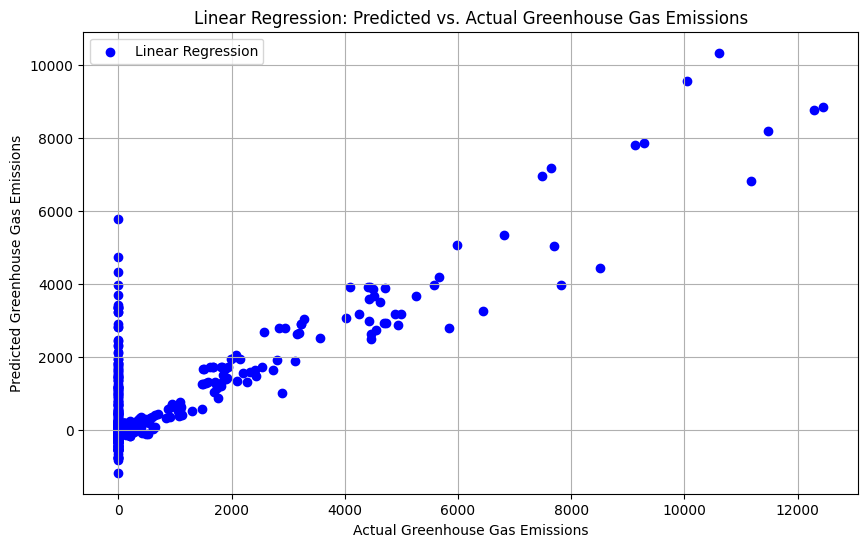

In [ ]:
import matplotlib.pyplot as plt

# Extract predicted and actual values for Linear Regression model
predicted_lr = predictions_lr.select("prediction").rdd.map(lambda row: row[0]).collect()
actual_lr = predictions_lr.select("greenhouse_gas_emissions").rdd.map(lambda row: row[0]).collect()

# Extract predicted and actual values for Gradient Boosting Regressor model
predicted_gbt = predictions_gbt.select("prediction").rdd.map(lambda row: row[0]).collect()
actual_gbt = predictions_gbt.select("greenhouse_gas_emissions").rdd.map(lambda row: row[0]).collect()

# Create scatter plot for Linear Regression model
plt.figure(figsize=(10, 6))
plt.scatter(actual_lr, predicted_lr, color='blue', label='Linear Regression')
plt.xlabel('Actual Greenhouse Gas Emissions')
plt.ylabel('Predicted Greenhouse Gas Emissions')
plt.title('Linear Regression: Predicted vs. Actual Greenhouse Gas Emissions')
plt.legend()
plt.grid(True)
plt.show()

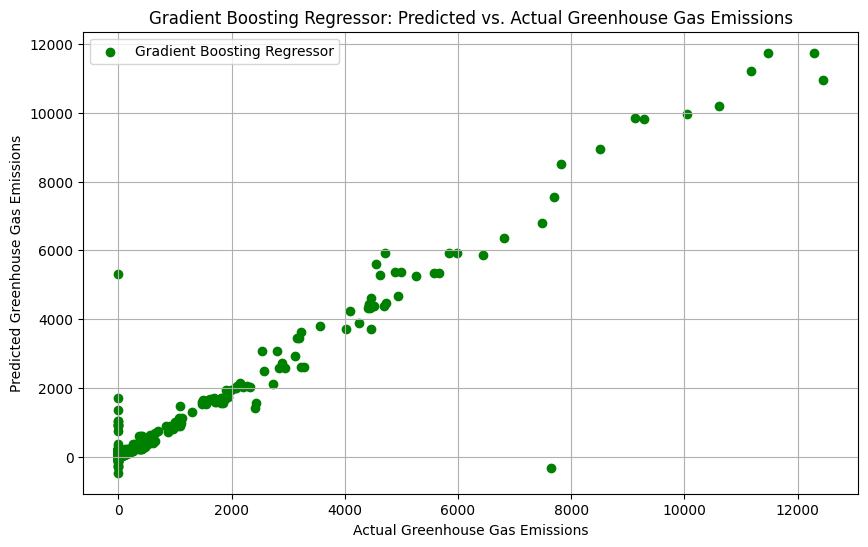

In [ ]:
# Create scatter plot for Gradient Boosting Regressor model
plt.figure(figsize=(10, 6))
plt.scatter(actual_gbt, predicted_gbt, color='green', label='Gradient Boosting Regressor')
plt.xlabel('Actual Greenhouse Gas Emissions')
plt.ylabel('Predicted Greenhouse Gas Emissions')
plt.title('Gradient Boosting Regressor: Predicted vs. Actual Greenhouse Gas Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_indexed.write.csv("file:///C:/Users/Dell/OneDrive/Desktop/newWorld_EnergyConsumption.csv", header=True, mode="overwrite")
